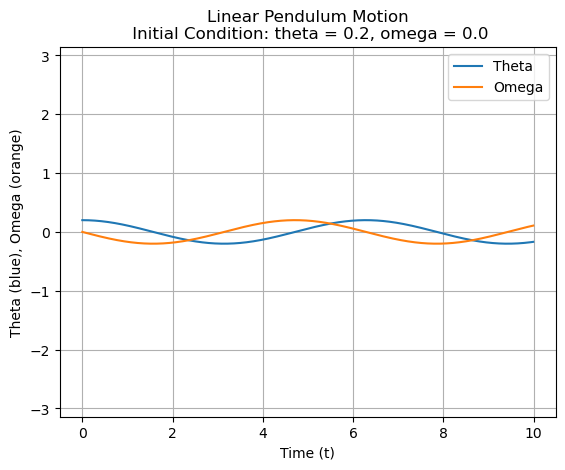

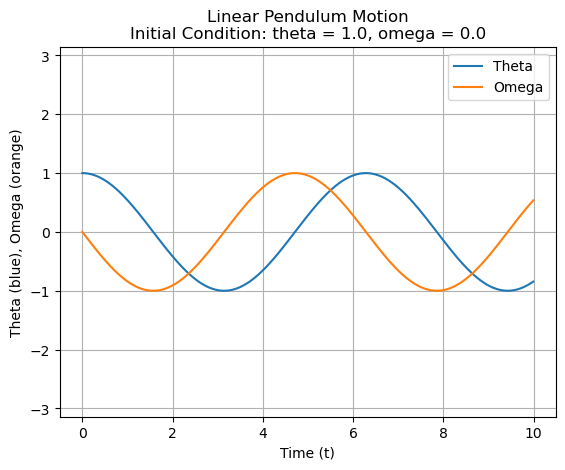

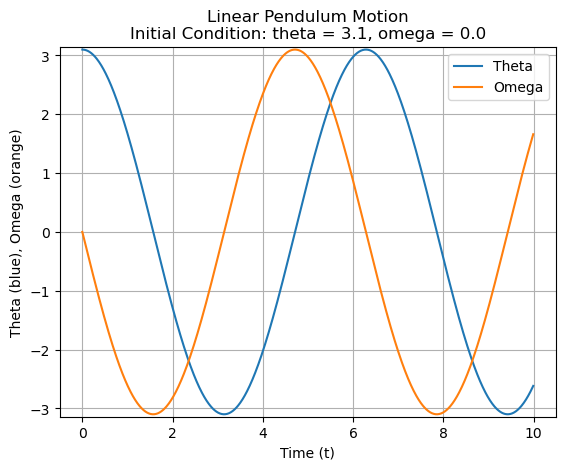

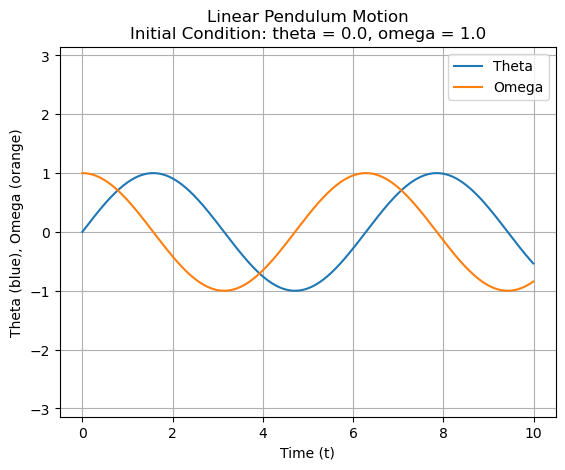

In [1]:

import math
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the pendulum model
k = 0.0  # Dampening coefficient
fi = 0.66667  # Frequency of external driving force
A = 0.0  # Amplitude of the driving force
g = 1.0  # Acceleration due to gravity
L = 1.0  # Length of the pendulum

# Function of linear pendulum model
'''
    Function to compute the derivative of theta with respect to time for a linear pendulum.
    
    Parameters:
        theta: Angle of the pendulum.
        omega: Angular velocity of the pendulum.
        t: Time.
    
    Returns:
        Derivative of theta with respect to time and omega.
'''
def f(theta, omega, t):
    force = (- g / L) * theta - k * omega + A * math.cos(fi*t)
    return force

# Function to perform numerical integration using the Trapezoid method
'''
    Function to perform numerical integration of a differential equation using the Trapezoid method.
    
    Parameters:
        theta: Initial angle of the pendulum.
        omega: Initial angular velocity of the pendulum.
        t: Initial time.
        dt: Time step size.
        nsteps: Number of time steps.
    
    Returns:
        Lists of time, theta, and omega values over the integration period.
'''
def trapezoid_method(theta, omega, t, dt, nsteps):
    # Lists to store the history of theta and omega
    list_theta = [theta]
    list_omega = [omega]
    list_time = [t]

    # Trapezoid method to loop over the discrete timeline
    for _ in range(1, nsteps):
        # Trapezoid blocks
        k1a = dt * omega
        k1b = dt * f(theta, omega, t)
        k2a = dt * (omega + k1b)
        k2b = dt * f(theta + k1a, omega + k1b, t + dt)
        theta = theta + (k1a + k2a)/2
        omega = omega + (k1b + k2b)/2
 
        # evolve time step
        t = t + dt
    
        # Appending the lists
        list_theta.append(theta)
        list_omega.append(omega)
        list_time.append(t)
    return list_time, list_theta, list_omega
    
# Setting the initial conditions( theta, omega, time)
theta_initial = 0.2  # Initial angle
omega_initial = 0.0  # Initial angular velocity
t_initial = 0.0  # Initial time 
dt = 0.01  # Time step size
nsteps = 1000  # Number of time steps

# Run the Trapezoid method for the initial conditions
list_time, list_theta, list_omega = trapezoid_method(theta_initial, omega_initial, t_initial, dt, nsteps)

# plotting instructions
plt.plot(list_time, list_theta, label='Theta')
plt.plot(list_time, list_omega, label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Theta (blue), Omega (orange)')
plt.title('Linear Pendulum Motion\n Initial Condition: theta = {}, omega = {}'.format(theta_initial, omega_initial))
plt.legend()
plt.grid(True)
plt.ylim(-math.pi,math.pi)
plt.show()

# Initial conditions for different sets
initial_conditions = [(1.0,0.0),(3.1,0.0),(0.0,1.0)]

# PLotting for different initial condition
for ic in initial_conditions:
    theta_initial , omega_initial = ic
    theta = theta_initial
    omega = omega_initial
    
    # Reset time and lists
    t = 0.0
    list_theta = [theta]
    list_omega = [omega]
    list_time = [t]
    
    # Run the Trapezoid method for the initial conditions
    list_time, list_theta, list_omega = trapezoid_method(theta_initial, omega_initial, t_initial, dt, nsteps)
 
    # Plotting for each set of initial conitions
    plt.figure()
    plt.plot(list_time, list_theta, label='Theta')
    plt.plot(list_time, list_omega, label='Omega')
    plt.xlabel('Time (t)')
    plt.ylabel('Theta (blue), Omega (orange)')
    plt.title('Linear Pendulum Motion\nInitial Condition: theta = {}, omega = {}'.format(theta_initial, omega_initial))
    plt.legend()
    plt.grid(True)
    plt.ylim(-math.pi, math.pi)
    plt.show()


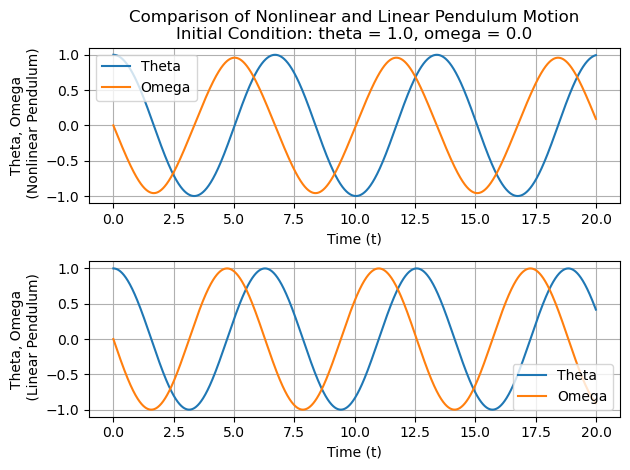

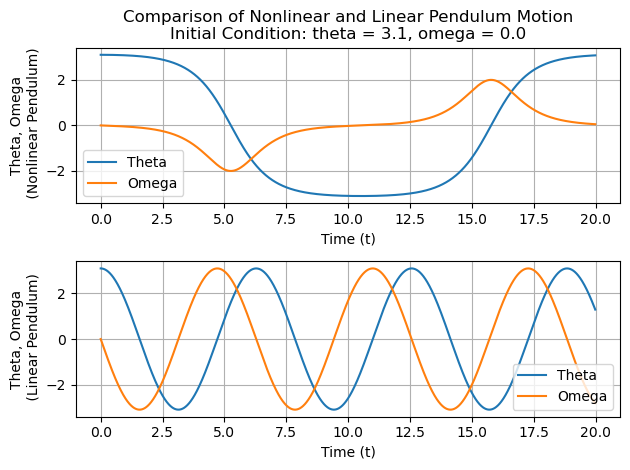

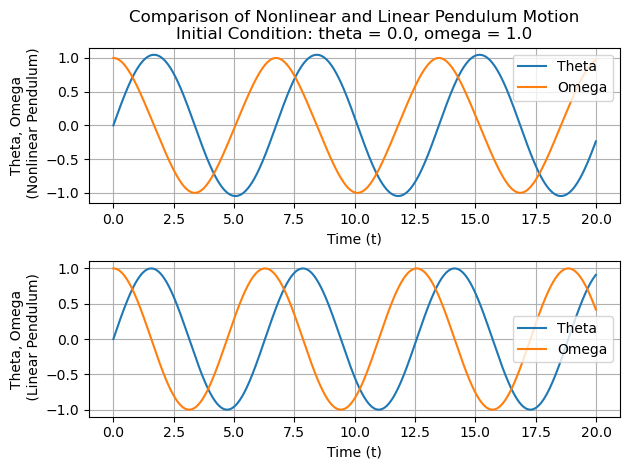

In [79]:

import math
import numpy as np 
import matplotlib.pyplot as plt

# Parameters for the pendulum model
k = 0.0  # Dampening coefficient
fi = 0.66667  # Frequency of external driving force
A = 0.0  # Amplitude of the driving force
g = 1.0  # Acceleration due to gravity
L = 1.0  # Length of the pendulum

# Function of linear pendulum model
"""
Function to compute the derivative of theta with respect to time for a linear pendulum.
Parameters:
    theta: Angle of the pendulum.
    omega: Angular velocity of the pendulum.
    t: Time.
Returns:
    Derivative of theta with respect to time and omega.
"""
def f_lin(theta, omega, t):
    force = (- g / L) * theta - k * omega + A * math.cos(fi*t)
    return force

# Function of nonlinear pendulum model
"""
Function to compute the derivative of theta with respect to time for a nonlinear pendulum.
Parameters:
    theta: Angle of the pendulum.
    omega: Angular velocity of the pendulum.
    t: Time.
Returns:
    Derivative of theta with respect to time and omega.
"""
def f_nonlin(theta, omega, t):
    force = (- g / L) * math.sin(theta) - k * omega + A * math.cos(fi*t)
    return force

# Initial conditions for different sets
initial_conditions = [(1.0,0.0),(3.1,0.0),(0.0,1.0)]

# Time parameters
t = 0.0  # Initial time 
dt = 0.01  # Time step size
nsteps = 2000  # Number of time steps

# PLotting for different initial condition for both pendulums
for ic in initial_conditions:
    theta_initial , omega_initial = ic
   
    # Reset time and lists for nonlinear pendulum
    theta = theta_initial
    omega = omega_initial
    t = 0.0
    list_theta_nonlin = [theta]
    list_omega_nonlin = [omega]
    list_time_nonlin = [t]
    
    # Reset time and lists for linear pendulum
    theta = theta_initial
    omega = omega_initial
    t = 0.0
    list_theta_linear = [theta]
    list_omega_linear = [omega]
    list_time_linear = [t]
    
    # Simulation for nonlinear pendulum
    for _ in range(1, nsteps):
        # Trapezoid blocks
        k1a = dt * omega
        k1b = dt * f_nonlin(theta, omega, t)
        k2a = dt * (omega + k1b)
        k2b = dt * f_nonlin(theta + k1a, omega + k1b, t + dt)
        theta = theta + (k1a + k2a)/2
        omega = omega + (k1b + k2b)/2
 
        # evolve time step
        t = t + dt
    
        # Appending the lists
        list_theta_nonlin.append(theta)
        list_omega_nonlin.append(omega)
        list_time_nonlin.append(t)
        
    # Simulation for linear pendulum
    # Resetting the conditions
    theta = theta_initial
    omega = omega_initial
    t = 0.0
    
    for _ in range(1, nsteps):
        # Trapezoid blocks
        k1a = dt * omega
        k1b = dt * f_lin(theta, omega, t)
        k2a = dt * (omega + k1b)
        k2b = dt * f_lin(theta + k1a, omega + k1b, t + dt)
        theta = theta + (k1a + k2a)/2
        omega = omega + (k1b + k2b)/2
 
        # evolve time step
        t = t + dt
    
        # Appending the lists
        list_theta_linear.append(theta)
        list_omega_linear.append(omega)
        list_time_linear.append(t)
        
    # Plotting θ × t for nonlinear pendulum
    plt.subplot(2, 1, 1)
    plt.plot(list_time_nonlin, list_theta_nonlin, label='Theta')
    plt.plot(list_time_nonlin, list_omega_nonlin, label='Omega')
    plt.xlabel('Time (t)')
    plt.ylabel('Theta, Omega\n (Nonlinear Pendulum)')
    plt.title('Comparison of Nonlinear and Linear Pendulum Motion\nInitial Condition: theta = {}, omega = {}'.format(theta_initial, omega_initial))
    plt.legend()
    plt.grid(True)
    
    # Plotting θ × t for linear pendulum
    plt.subplot(2, 1, 2)
    plt.plot(list_time_linear, list_theta_linear, label='Theta')
    plt.plot(list_time_linear, list_omega_linear, label='Omega')
    plt.xlabel('Time (t)')
    plt.ylabel('Theta, Omega\n (Linear Pendulum)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    

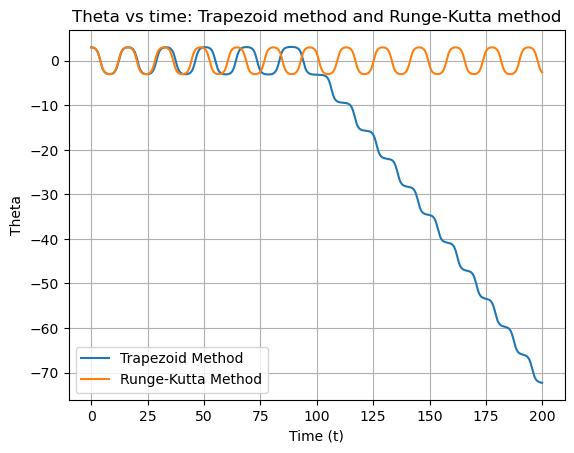

In [8]:

import matplotlib.pyplot as plt
import numpy as np
import math

# Parameters for the pendulum model
k = 0.0  # Dampening coefficient
fi = 0.66667  # Frequency of external driving force
A = 0.0  # Amplitude of the driving force
g = 1.0  # Acceleration due to gravity
L = 1.0  # Length of the pendulum
fig1, ax1 = plt.subplots()

# Function of nonlinear pendulum model
"""
Function to compute the derivative of theta with respect to time for a nonlinear pendulum.
Parameters:
    theta: Angle of the pendulum.
    omega: Angular velocity of the pendulum.
    t: Time.
Returns:
    Derivative of theta with respect to time and omega.
"""
def f_nonlin(theta, omega, t):
    force = (-g/L) * math.sin(theta) - k * omega + A * math.cos(fi * t)
    return force

# Function for Trapezoid method
"""
Function to perform numerical integration of a differential equation using the Trapezoid method.
Parameters:
    theta: Initial angle of the pendulum.
    omega: Initial angular velocity of the pendulum.
    t: Initial time.
    dt: Time step size.
    npoints: Number of time steps.
Returns:
    Lists of time, theta, and omega values over the integration period.
"""
def trapezoid_method(theta, omega, t, dt, npoints):
    # Lists to store the history of theta and omega
    list_theta = [theta]
    list_omega = [omega]
    list_time = [t]
    
    # Trapezoid method loop over the discrete timeline
    for nstep in range(1, npoints):
        # Trapezoid block
        k1a = dt * omega
        k1b = dt * f_nonlin(theta, omega, t)
        k2a = dt * (omega + k1b)
        k2b = dt * f_nonlin(theta + k1a, omega + k1b, t + dt)
        theta = theta + (k1a + k2a)/2
        omega = omega + (k1b + k2b)/2

        # Evolve time step
        t = t + dt

        # Appending the lists
        list_theta.append(theta)
        list_omega.append(omega)
        list_time.append(t)

    return list_time, list_theta, list_omega

# Function for the Runge-Kutta method
"""
Function to perform numerical integration of a differential equation using the Runge-Kutta method.
Parameters:
    theta: Initial angle of the pendulum.
    omega: Initial angular velocity of the pendulum.
    t: Initial time.
    dt: Time step size.
    nsteps: Number of time steps.  
Returns:
    Lists of time, theta, and omega values over the integration period.
"""
def runge_kutta_method(theta, omega, t, dt, npoints):
    # Lists to store the history of theta and omega
    list_theta = [theta]
    list_omega = [omega]
    list_time = [t]
    
    # Runge-Kutta method loop over the discrete timeline
    for nstep in range(1, npoints):
        # Runge-Kutta block
        k1_theta = dt * omega
        k1_omega = dt * f_nonlin(theta, omega, t)
        k2_theta = dt * (omega + k1_omega / 2)
        k2_omega = dt * f_nonlin(theta + k1_theta / 2, omega + k1_omega / 2, t + dt / 2)
        k3_theta = dt * (omega + k2_omega / 2)
        k3_omega = dt * f_nonlin(theta + k2_theta / 2, omega + k2_omega / 2, t + dt / 2)
        k4_theta = dt * (omega + k3_omega)
        k4_omega = dt * f_nonlin(theta + k3_theta, omega + k3_omega, t + dt)
        
        theta = theta + (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) / 6
        omega = omega + (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) / 6
        
        # Evolve time step
        t = t + dt

        # Appending the lists
        list_theta.append(theta)
        list_omega.append(omega)
        list_time.append(t)

    return list_time, list_theta, list_omega

# Function to plot theta for the Trapezoid method and RK method vs. time
"""
Function to plot theta for the Trapezoid method and RK method vs. time.
Parameters:
    list_time: List of time values.
    list_theta: List of theta values.
    title: Title for the plot.
"""
def plot_theta_omega(list_time, list_theta, title):
    ax1.plot(list_time, list_theta, label='{}'.format(title))
    ax1.set_xlabel('Time (t)')
    ax1.set_ylabel('Theta')
    ax1.set_title('Theta vs time: Trapezoid method and Runge-Kutta method')
    ax1.grid(True)
    ax1.legend()
    
# set time parameters and nuumber of steps
dt = 0.1
npoints = 2000

# Initial conditions: theta(t = 0) = 3.0, omega(t = 0) = 0.0
theta_init = 3.0
omega_init = 0.0
t_init = 0.0

# Run the trapezoid method
list_time_trap, list_theta_trap, list_omega_trap = trapezoid_method(theta_init, omega_init, t_init, dt, npoints)

# Plot results from trapezoid method
plot_theta_omega(list_time_trap, list_theta_trap, 'Trapezoid Method')

# Run the Runge-Kutta method
list_time_rk, list_theta_rk, list_omega_rk = runge_kutta_method(theta_init, omega_init, t_init, dt, npoints)

# Plot results from Runge-Kutta method
plot_theta_omega(list_time_rk, list_theta_rk, 'Runge-Kutta Method')


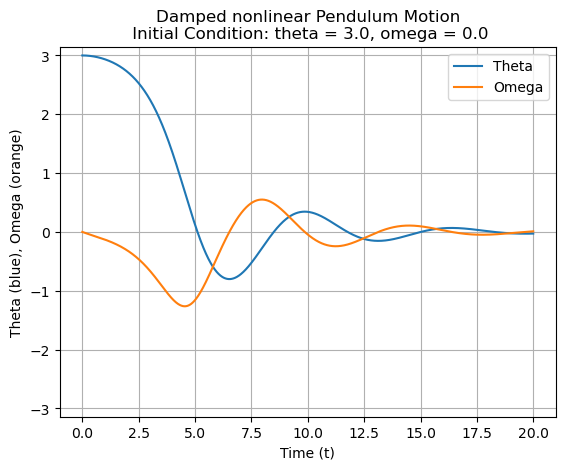

In [75]:

import math
import numpy as np 
import matplotlib.pyplot as plt

# Parameters for the pendulum model
k = 0.5  # Dampening coefficient
fi = 0.66667  # Frequency of external driving force
A = 0.0  # Amplitude of the driving force
g = 1.0  # Acceleration due to gravity
L = 1.0  # Length of the pendulum

# Function of damped nonlinear pendulum model
"""
Function to compute the derivative of theta with respect to time for a damped nonlinear pendulum.
Parameters:
    theta: Angle of the pendulum.
    omega: Angular velocity of the pendulum.
    t: Time.
Returns:
    Derivative of theta with respect to time and omega.
"""
def f_nonlin_damped(theta, omega, t):
    force = (- g / L) * math.sin(theta) - k * omega + A * math.cos(fi*t)
    return force

# Function for the Runge-Kutta method
"""
Function to perform numerical integration of a differential equation using the Runge-Kutta method.
Parameters:
    theta: Initial angle of the pendulum.
    omega: Initial angular velocity of the pendulum.
    t: Initial time.
    dt: Time step size.
    nsteps: Number of time steps.
Returns:
    Lists of time, theta, and omega values over the integration period.
    """
def runge_kutta_method(theta, omega, t, dt, nsteps):
    # Lists to store the history of theta and omega
    list_theta = [theta]
    list_omega = [omega]
    list_time = [t]

    # Runge-Kutta method to loop over the discrete timeline
    for _ in range(1, nsteps):
        # Runge-Kutta code
        k1a = dt * omega
        k1b = dt * f_nonlin_damped(theta, omega, t)
        k2a = dt * (omega + k1b/2)
        k2b = dt * f_nonlin_damped(theta + k1a/2, omega + k1b/2, t + dt/2)
        k3a = dt * (omega + k2b/2)
        k3b = dt * f_nonlin_damped(theta + k2a/2, omega + k2b/2, t + dt/2)
        k4a = dt * (omega + k3b)
        k4b = dt * f_nonlin_damped(theta + k3a, omega + k3b, t + dt)
        theta = theta + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
        omega = omega + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
 
        # evolve time step
        t = t + dt
    
        # Appending the lists
        list_theta.append(theta)
        list_omega.append(omega)
        list_time.append(t)
    return list_time, list_theta, list_omega

# Setting the initial conditions( theta, omega, time)
theta_initial = 3.0  # Initial angle
omega_initial = 0.0  # Initial angular velocity
t_initial = 0.0  # Initial time 
dt = 0.01  # Time step size
nsteps = 2000  # Number of time steps

# Run the Runge-Kutta method
list_time_rk, list_theta_rk, list_omega_rk = runge_kutta_method(theta_initial, omega_initial, t_initial, dt, nsteps)

# Plotting instructions for the Runge-Kutta method
plt.plot(list_time_rk, list_theta_rk, label='Theta')
plt.plot(list_time_rk, list_omega_rk, label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Theta (blue), Omega (orange)')
plt.title('Damped nonlinear Pendulum Motion\n Initial Condition: theta = 3.0, omega = 0.0')
plt.legend()
plt.grid(True)
plt.ylim(-math.pi,math.pi)
plt.show()



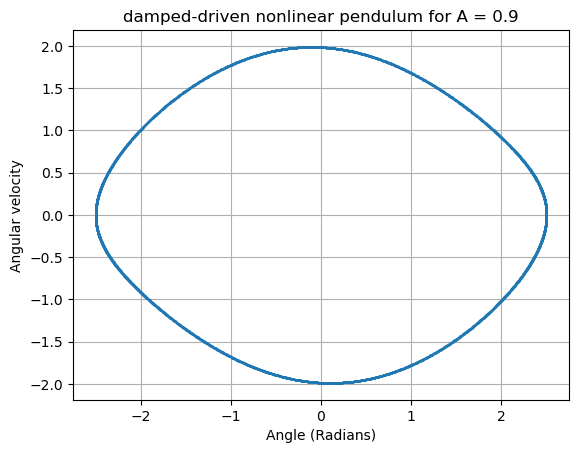

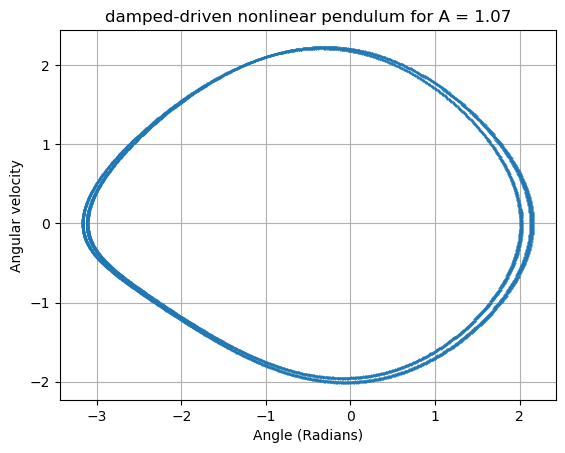

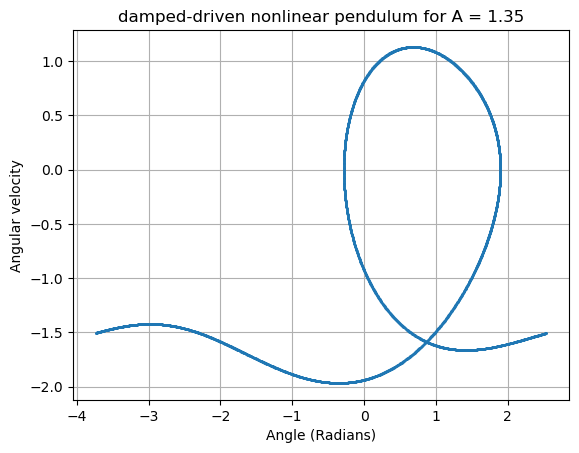

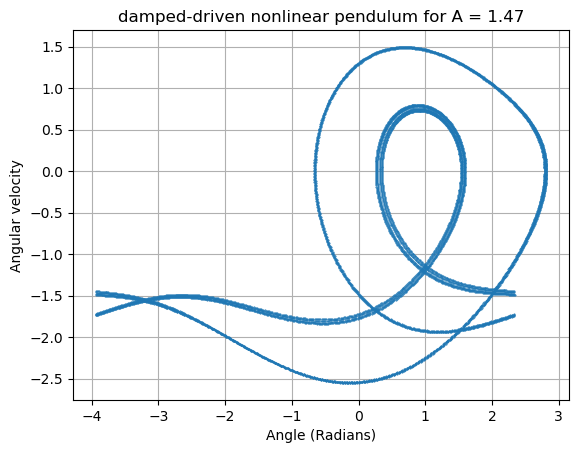

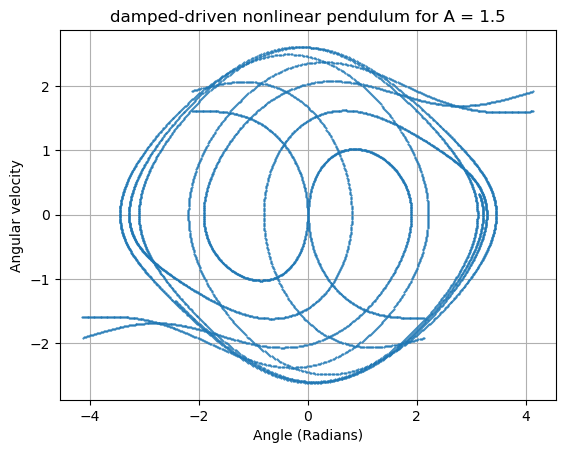

In [4]:

import math
import numpy as np 
import matplotlib.pyplot as plt

# Parameters for the pendulum model
k = 0.5 # dampening coefficient
fi = 0.66667 # frequenct of external driving force
list_A = [0.90, 1.07, 1.35, 1.47, 1.5] # amplitude of driving force
g = 1.0 # acceleration due to gravity
L = 1.0 # length of pendulum 
transient = 5000 # transient setting
Q = 0.0 # shift parameter

# Function for our pendulum model (non-linear approximation)
"""
Function to compute the derivative of theta with respect to time for a nonlinear pendulum.
Parameters:
    theta: Angle of the pendulum.
    omega: Angular velocity of the pendulum.
    t: Time.
Returns:
    Derivative of theta with respect to time and omega.
"""
def f_nonlin(theta, omega, t):
    force = (-g/L)*math.sin(theta) - k*omega + i*math.cos(fi*t)
    return force

#For loop for each A value
for i in list_A:
    # Setting and resetting the initial conditions (theta, omega, time)
    theta = 0.2
    omega = 0.0
    t = 0.0
    dt = 0.01
    npoints = 12000
    Q = Q + 0.2 # increasing phase shift per a
    
    # Lists to store the history of theta, omega, time, and time array
    list_theta =[]
    list_omega = []
    list_time = []
    t_arr = np.array([])
    
    # Trapezoid method loop over the discrete timeline
    while len(t_arr) < transient:
        for nstep in range(1,npoints):
            # Runge-Kutta method
            k1a = dt * omega
            k1b = dt * f_nonlin(theta, omega, t)
            k2a = dt * (omega + k1b/2)
            k2b = dt * f_nonlin(theta + k1a/2, omega + k1b/2, t + dt/2)
            k3a = dt * (omega + k2b/2)
            k3b = dt * f_nonlin(theta + k2a/2, omega + k2b/2, t + dt/2)
            k4a = dt * (omega + k3b)
            k4b = dt * f_nonlin(theta + k3a, omega + k3b, t + dt)
            theta = theta + (k1a + 2 * k2a + 2 * k3a + k4a)/6
            
            # Setting the parameters for greater or lesser than pi
            # if theta is greater than pi, it will shift it to the left
            if theta >= (np.pi+Q):
                theta = theta - 2*np.pi
            # if theta is lesser than pi + Q, it will shift it to the right
            if theta <= -(np.pi+Q):
                theta = theta + 2*np.pi
            omega = omega + (k1b + 2 * k2b + 2 * k3b + k4b)/6

            # evolve time step
            t = t + dt
            t_arr = np.append(t_arr, t)
            
            #Adding to omega and theta lists
            if len(t_arr) > transient: 
                list_theta.append(theta)
                list_omega.append(omega)
                list_time.append(t)

    # plotting instructions
    # Creates subplots for each A value
    fig, ax = plt.subplots()
    # Plots omega and theta
    ax.plot(list_theta, list_omega, '.', ms=1)
    # Setting axis titles and plot titles
    ax.set_xlabel('Angle (Radians)')
    ax.set_ylabel('Angular velocity')
    ax.set_title("damped-driven nonlinear pendulum for A = {}".format(i))
    ax.grid(True)
    

    